__Base__: https://colab.research.google.com/github/hse-ds/iad-deep-learning/blob/master/2021/sem01/sem01.ipynb#scrollTo=FU7kA1HZwoRT

## Вступление

Всем привет! На сегодняшнем семинаре мы познакомимся с библиотекой **pytorch**. Он очень похож на numpy, с одним лишь отличием (на самом деле их больше, но сейчас мы поговорим про самое главное) -- pytorch может считать градиенты за вас. Таким образом вам не надо будет руками писать обратный проход в нейросетях. 

#### Семинар построен следующим образом:

1. Вспоминаем numpy и сравниваем операции в pytorch
2. Создаем тензоры в pytorch
3. Работаем с градиентами руками
4. Моя первая нейросеть 

### 1. Вспоминаем numpy и сравниваем операции в pytorch

Мы можем создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [1]:
import numpy as np 
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

from sklearn.datasets import load_boston
from tqdm.notebook import tqdm

%matplotlib inline

In [2]:
a = np.random.rand(5, 3) # создали случайную матрицу 
a

array([[0.05117059, 0.52619182, 0.11528063],
       [0.94345386, 0.60563351, 0.1553551 ],
       [0.58015422, 0.63800052, 0.53798078],
       [0.08816588, 0.51844741, 0.80046587],
       [0.12159501, 0.50943788, 0.48979725]])

In [3]:
print("Проверили размеры : %s\n" % (a.shape,))

Проверили размеры : (5, 3)



In [4]:
print("Добавили 5 :\n%s\n" % (a + 5))

Добавили 5 :
[[5.05117059 5.52619182 5.11528063]
 [5.94345386 5.60563351 5.1553551 ]
 [5.58015422 5.63800052 5.53798078]
 [5.08816588 5.51844741 5.80046587]
 [5.12159501 5.50943788 5.48979725]]



In [5]:
print("X*X^T  :\n%s\n" % np.dot(a, a.T))

X*X^T  :
[[0.29278589 0.38486592 0.42741625 0.3695925  0.33074827]
 [0.38486592 1.28103235 1.01732129 0.52152602 0.49934443]
 [0.42741625 1.01732129 1.0330469  0.81255477 0.659067  ]
 [0.3695925  0.52152602 0.81255477 0.91730654 0.66690326]
 [0.33074827 0.49934443 0.659067   0.66690326 0.51421365]]



In [6]:
print("Среднее по колонкам :\n%s\n" % (a.mean(axis=1)))

Среднее по колонкам :
[0.23088101 0.56814749 0.58537851 0.46902638 0.37361005]



In [7]:
#analog
a

array([[0.05117059, 0.52619182, 0.11528063],
       [0.94345386, 0.60563351, 0.1553551 ],
       [0.58015422, 0.63800052, 0.53798078],
       [0.08816588, 0.51844741, 0.80046587],
       [0.12159501, 0.50943788, 0.48979725]])

In [8]:
a.T

array([[0.05117059, 0.94345386, 0.58015422, 0.08816588, 0.12159501],
       [0.52619182, 0.60563351, 0.63800052, 0.51844741, 0.50943788],
       [0.11528063, 0.1553551 , 0.53798078, 0.80046587, 0.48979725]])

In [9]:
print("Изменили размеры :\n%s\n" % (a.reshape(3, 5).shape,))

Изменили размеры :
(3, 5)



In [10]:
a.reshape(3, 5)

array([[0.05117059, 0.52619182, 0.11528063, 0.94345386, 0.60563351],
       [0.1553551 , 0.58015422, 0.63800052, 0.53798078, 0.08816588],
       [0.51844741, 0.80046587, 0.12159501, 0.50943788, 0.48979725]])

#### Разминка.

При помощи numpy посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [11]:
(np.arange(1, 10001).astype('int64') ** 2).sum()

333383335000

Аналогичные операции в **pytorch** выглядят следующим образом, синтаксис отличается, но совсем немного:

In [12]:
x = torch.rand(5, 3)
x

tensor([[0.6687, 0.8400, 0.7585],
        [0.0654, 0.0653, 0.2895],
        [0.4645, 0.0140, 0.1688],
        [0.5513, 0.1548, 0.8823],
        [0.1704, 0.3635, 0.3877]])

In [13]:
print("Проверили размеры : %s\n" % (x.shape,))

Проверили размеры : torch.Size([5, 3])



In [14]:
print("Добавили 5 :\n%s\n" % (x + 5))

Добавили 5 :
tensor([[5.6687, 5.8400, 5.7585],
        [5.0654, 5.0653, 5.2895],
        [5.4645, 5.0140, 5.1688],
        [5.5513, 5.1548, 5.8823],
        [5.1704, 5.3635, 5.3877]])



In [15]:
x.t()

tensor([[0.6687, 0.0654, 0.4645, 0.5513, 0.1704],
        [0.8400, 0.0653, 0.0140, 0.1548, 0.3635],
        [0.7585, 0.2895, 0.1688, 0.8823, 0.3877]])

In [16]:
x.view(3, 5) # aka reshape

tensor([[0.6687, 0.8400, 0.7585, 0.0654, 0.0653],
        [0.2895, 0.4645, 0.0140, 0.1688, 0.5513],
        [0.1548, 0.8823, 0.1704, 0.3635, 0.3877]])

In [17]:
print("X*X^T  (1):\n%s\n" % (torch.matmul(x, x.transpose(1, 0))))
print("X*X^T  (2):\n%s\n" % (x.mm(x.t())))

X*X^T  (1):
tensor([[1.7280, 0.3182, 0.4504, 1.1678, 0.7133],
        [0.3182, 0.0924, 0.0802, 0.3016, 0.1471],
        [0.4504, 0.0802, 0.2445, 0.4071, 0.1497],
        [1.1678, 0.3016, 0.4071, 1.1063, 0.4923],
        [0.7133, 0.1471, 0.1497, 0.4923, 0.3115]])

X*X^T  (2):
tensor([[1.7280, 0.3182, 0.4504, 1.1678, 0.7133],
        [0.3182, 0.0924, 0.0802, 0.3016, 0.1471],
        [0.4504, 0.0802, 0.2445, 0.4071, 0.1497],
        [1.1678, 0.3016, 0.4071, 1.1063, 0.4923],
        [0.7133, 0.1471, 0.1497, 0.4923, 0.3115]])



In [18]:
print("Среднее по колонкам :\n%s\n" % (x.mean(dim=-1)))

Среднее по колонкам :
tensor([0.7557, 0.1401, 0.2158, 0.5294, 0.3072])



In [19]:
print("Изменили размеры :\n%s\n" % (x.view([3, 5]).shape,))
print("Изменили размеры :\n%s\n" % (x.view_as(x.t()).shape,))

Изменили размеры :
torch.Size([3, 5])

Изменили размеры :
torch.Size([3, 5])



Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype('int64') -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог операции в numpy


#### Разминка на pytorch

При помощи pytorch посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [20]:
(torch.arange(1, 10001) ** 2).sum()

tensor(333383335000)

### 2. Создаем тензоры в pytorch и снова изучаем базовые операции

In [21]:
x = torch.empty(3, 3) # пустой тензор
# есть инициализация на уровне нуля
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [22]:
x = torch.rand(5, 3) # тензор со случайными числами
print(x)

tensor([[0.2191, 0.0129, 0.7927],
        [0.9066, 0.5237, 0.6711],
        [0.3526, 0.6262, 0.7066],
        [0.2795, 0.6594, 0.1902],
        [0.0635, 0.5127, 0.8080]])


In [23]:
x = torch.zeros(3, 3, 1, dtype=torch.long) # тензор с нулями и указанием типов чисел
print(x)

tensor([[[0],
         [0],
         [0]],

        [[0],
         [0],
         [0]],

        [[0],
         [0],
         [0]]])


In [24]:
x.view(1,9).shape

torch.Size([1, 9])

In [25]:
x = torch.tensor([5.5, 3, 45, 23]) # конструируем тензор из питоновского листа
print(x)

tensor([ 5.5000,  3.0000, 45.0000, 23.0000])


In [26]:
x = x.new_ones(3, 3, dtype=torch.double) # используем уже созданный тензор для создания тензора из единичек
print(x, x.size())

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64) torch.Size([3, 3])


In [27]:
x = torch.randn_like(x, dtype=torch.float) # создаем матрицу с размерами как у x
print(x, x.size())

tensor([[ 1.9111,  1.2070,  0.2549],
        [-0.4058,  0.6001,  1.1434],
        [ 0.6290, -0.3489,  0.6413]]) torch.Size([3, 3])


In [28]:
y = torch.rand(3, 3)
print(x + y) # операция сложение

tensor([[ 2.7827,  1.3676,  0.8543],
        [-0.3149,  1.1296,  1.5253],
        [ 1.2633, -0.1625,  1.3097]])


In [29]:
z = torch.add(x, y) # очередная операция сложения
print(z)

tensor([[ 2.7827,  1.3676,  0.8543],
        [-0.3149,  1.1296,  1.5253],
        [ 1.2633, -0.1625,  1.3097]])


In [30]:
torch.add(x, y, out=z) # и наконец последний вид
print(z)

tensor([[ 2.7827,  1.3676,  0.8543],
        [-0.3149,  1.1296,  1.5253],
        [ 1.2633, -0.1625,  1.3097]])


In [31]:
print(x * y) # поэлементное умножение

tensor([[ 1.6657,  0.1939,  0.1528],
        [-0.0369,  0.3177,  0.4366],
        [ 0.3990, -0.0651,  0.4286]])


In [32]:
print(x @ y.t()) # матричное умножение

tensor([[2.0125, 0.9101, 1.6077],
        [0.4281, 0.7175, 0.6187],
        [0.8766, 0.1173, 0.7626]])


In [33]:
print(x.mm(y.t())) # и опять матричное умножение, matrix multiply

tensor([[2.0125, 0.9101, 1.6077],
        [0.4281, 0.7175, 0.6187],
        [0.8766, 0.1173, 0.7626]])


In [34]:
x.view(9).shape

torch.Size([9])

In [35]:
print(x.shape)
x

torch.Size([3, 3])


tensor([[ 1.9111,  1.2070,  0.2549],
        [-0.4058,  0.6001,  1.1434],
        [ 0.6290, -0.3489,  0.6413]])

In [36]:
print(x.unsqueeze(0).shape) # добавили измерение в начало, аналог броадкастинга 
x.unsqueeze(0)
# присмотрись к числу скобок

torch.Size([1, 3, 3])


tensor([[[ 1.9111,  1.2070,  0.2549],
         [-0.4058,  0.6001,  1.1434],
         [ 0.6290, -0.3489,  0.6413]]])

In [37]:
print(x.unsqueeze(0).squeeze(0).shape) # убрали измерение в начале, аналог броадкастинга 
x.unsqueeze(0).squeeze(0)

torch.Size([3, 3])


tensor([[ 1.9111,  1.2070,  0.2549],
        [-0.4058,  0.6001,  1.1434],
        [ 0.6290, -0.3489,  0.6413]])

Мы также можем делать обычные срезы и переводить матрицы назад в numpy:

In [38]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
print(np.allclose(x.numpy(), a))
print(np.allclose(x.numpy()[:, 1], a[:, 1]))

True
True


### 3. Работаем с градиентами руками

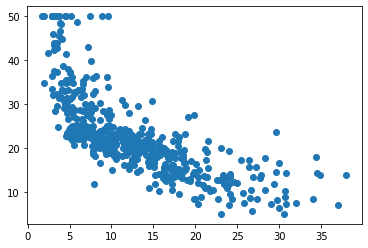

In [42]:
boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target)

В pytorch есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенту для всех тензоров, у которых `requires_grad=True`.

In [43]:
# случайные веса
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / boston.data[:, -1].max(), dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

assert w.grad is None # только создали тензоры и в них нет градиентов
assert b.grad is None

In [44]:
y_pred = w * x + b                 # и опять совершаем операции с тензорами
loss = torch.mean((y_pred - y)**2) # совершаем операции с тензорами. будем считать loss как MSE
loss.backward()                    # считаем градиенты

In [45]:
assert w.grad is not None # сделали операции и посчитали градиенты, значение должно было появится
assert b.grad is not None

print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-11.9612])
dL/db = 
 tensor([-43.6558])


In [94]:
print(x.requires_grad)

False


__Ремарка__. Для доступа к значениям в тензоре используйте атрибут `.data`:

In [95]:
# y = 0.6132*x + 0.2512

In [96]:
w.data, b.data

(tensor([0.3331]), tensor([0.9352]))

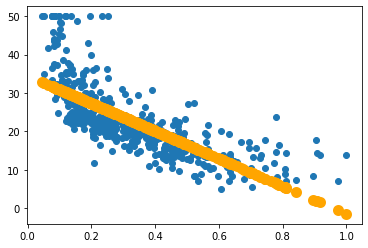

499
loss =  38.48316


In [97]:
from IPython.display import clear_output

lr = 0.2

for i in range(500):

    y_pred = w * x + b
    # попробуйте сделать полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss = torch.mean((y_pred - y) ** 2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = .2
    w.data -= lr* w.grad.data
    b.data -= lr* b.grad.data

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color='orange', linewidth=5)
        plt.show()
        
        print(i)
        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")

In [74]:
w.data, b.data

(tensor([-36.0010]), tensor([34.5289]))

In [48]:
# y = -36.0004*x + 34.5287

# Homework

1. Используя выше указанный подходи реализовать обучение для инверсивной функции:
* __y = 1/x+b__

In [162]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

tensor(457.0794, grad_fn=<MeanBackward0>)


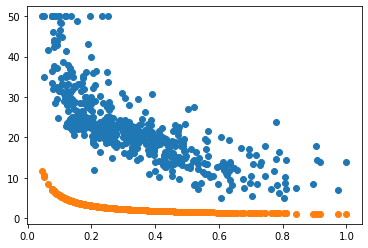

In [163]:
y_pred = w / x + b
loss = torch.mean((y_pred - y) ** 2)
loss.backward()
print(loss)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.scatter(x.data.numpy(), y_pred.data.numpy())

In [164]:
print(w.data)
print(b.data)

w.data -= 0.015 * w.grad.data
b.data -= 0.015 * b.grad.data

print(w.data)
print(b.data)

tensor([0.5096])
tensor([0.5431])
tensor([3.5674])
tensor([1.1373])


tensor(78.0168, grad_fn=<MeanBackward0>)


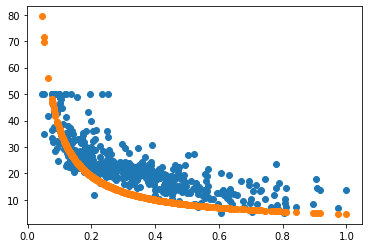

In [165]:
y_pred = w / x + b
loss = torch.mean((y_pred - y) ** 2)
print(loss)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.scatter(x.data.numpy(), y_pred.data.numpy())

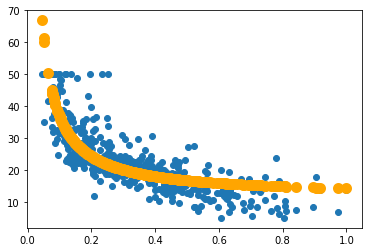

499
loss =  30.769306


In [46]:
from IPython.display import clear_output

lr = 0.015

# случайные веса
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

print(w, b)

for i in range(500):
    
    y_pred = w / x + b
    
    loss = torch.mean((y_pred - y) ** 2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = .2
    w.data -= lr * w.grad.data
    b.data -= lr * b.grad.data

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color='orange', linewidth=5)
        plt.show()
        
        print(i)
        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")

    if torch.isnan(loss) or torch.isinf(loss):
        break

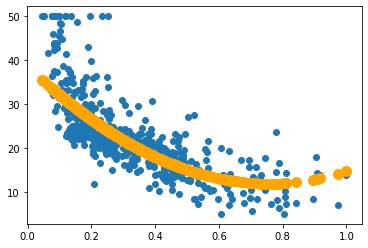

999
loss =  31.83264


In [47]:
from IPython.display import clear_output

lr = 0.015

# случайные веса
w = torch.rand(1, requires_grad=True)
w1 = torch.rand(1, requires_grad=True)
w2 = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

print(w, b)

for i in range(1000):

    y_pred = w * x**3 + w1 * x**2 + w2 * x + b
    # попробуйте сделать полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss = torch.mean((y_pred - y) ** 2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = .2
    w.data -= lr* w.grad.data
    w1.data -= lr* w1.grad.data
    w2.data -= lr* w2.grad.data
    b.data -= lr* b.grad.data

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i+1) % 10 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color='orange', linewidth=5)
        plt.show()
        
        print(i)
        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")

    if torch.isnan(loss) or torch.isinf(loss):
        break

### 4. Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросите в pytorch, нужно освоить три вещи: 

1. Как формировать батчи и пихать их в сетку
2. Как сделать сетку
3. Как написать цикл обучения и отслеживать метрики

#### Как формировать батчи и пихать их в сетку

Чтобы в данном фреймворке иметь возможность итерироваться по данным и применять к ним преобразования, например, аугментации, о которых вы узнаете позже -- нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

Вот пример из документации:

```
class FaceLandmarksDataset(torch.utils.data.Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample
```

Как вы видите, у такого класса **должно быть** два метода: 

* `__len__` -- возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` -- возвращает семпл и таргет к нему


Теперь давайте напишем такой сами, в качестве датасета сгенерируем рандомные данные.

In [147]:
class RandomDataset(torch.utils.data.Dataset):
    """Our random dataset"""
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return {'sample': torch.tensor(x[idx, :], dtype=torch.float), 'target': y[idx]}

In [148]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [149]:
our_dataset = RandomDataset(x, y)

In [150]:
our_dataset.__getitem__(1)

{'sample': tensor([0.3878, 0.1438, 0.6894, 0.6270, 0.8353]),
 'target': 0.5455028044198493}

In [151]:
our_dataset[:4]

{'sample': tensor([[0.7258, 0.7804, 0.5366, 0.2146, 0.7134],
         [0.3878, 0.1438, 0.6894, 0.6270, 0.8353],
         [0.2328, 0.4805, 0.3481, 0.5881, 0.8735],
         [0.8651, 0.2202, 0.7961, 0.8743, 0.7352]]),
 'target': array([0.57996449, 0.5455028 , 0.32052333, 0.07991391])}

Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от `torch.utils.data.Dataset`. Сейчас посмотрим на пример:

In [152]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

Работают с ним следующим образом:

In [155]:
for batch in dataloader:
    batch_x = batch['sample']
    batch_y = batch['target']
    break
print('Sample:', batch_x)
print('Target:', batch_y)

Sample: tensor([[0.7258, 0.7804, 0.5366, 0.2146, 0.7134],
        [0.3878, 0.1438, 0.6894, 0.6270, 0.8353],
        [0.2328, 0.4805, 0.3481, 0.5881, 0.8735],
        [0.8651, 0.2202, 0.7961, 0.8743, 0.7352]])
Target: tensor([0.5800, 0.5455, 0.3205, 0.0799], dtype=torch.float64)


#### Как сделать сетку

Для того, чтобы в high-level pytorch создавать нейросети используется модуль `nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса должно быть метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.

Есть еще один способ создать нейросеть и давайте его разберем на практике:

In [156]:
model = nn.Sequential()                 # создаем пустую модель, в которую будем добавлять слои
model.add_module('l1', nn.Linear(5, 3)) # добавили слой с 5-ю нейронами на вход и 3-мя на выход
model.add_module('l2', nn.ReLU())       # добавили функцию активации
model.add_module('l3', nn.Linear(3, 1)) # добавили слой с 3-мя нейронами на вход и 5-ю на выход

In [157]:
y_pred = model(batch_x) # получили предсказания модели

In [158]:
# ground truth [0.8217, 0.0767, 0.1246, 0.6831]
y_pred

tensor([[-0.5069],
        [-0.4991],
        [-0.4856],
        [-0.5096]], grad_fn=<AddmmBackward>)

#### Как написать цикл обучения и отслеживать метрики
 
Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [159]:
mnist_train = torchvision.datasets.MNIST(
    './mnist/', train=True, download=True, 
    transform=torchvision.transforms.ToTensor()
) # используем готовый класс от торча для загрузки данных для тренировки
mnist_val = torchvision.datasets.MNIST(
    './mnist/', train=False, download=True,
    transform=torchvision.transforms.ToTensor()
) # используем готовый класс от торча для загрузки данных для валидации

train_dataloader = torch.utils.data.DataLoader(
    mnist_train, batch_size=4, shuffle=True, num_workers=1
) # так как это уже унаследованный от Dataset класс, его можно сразу пихать в даталоадер

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, batch_size=4, shuffle=True, num_workers=1
) # так как это уже унаследованный от Dataset класс, его можно сразу пихать в даталоадер

0.0%

100.0%


Extracting ./mnist/MNIST\raw\train-images-idx3-ubyte.gz to ./mnist/MNIST\raw



102.8%


Extracting ./mnist/MNIST\raw\train-labels-idx1-ubyte.gz to ./mnist/MNIST\raw



0.1%

100.0%


Extracting ./mnist/MNIST\raw\t10k-images-idx3-ubyte.gz to ./mnist/MNIST\raw



112.7%

Extracting ./mnist/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./mnist/MNIST\raw




c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


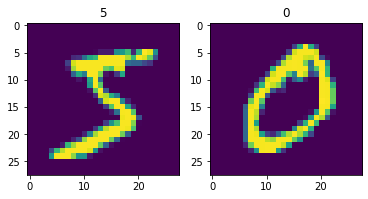

In [163]:
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [164]:
mnist_train[i][0].squeeze(0).numpy().shape

(28, 28)

In [165]:
model = nn.Sequential(
    nn.Flatten(),        # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(784, 128), # входной слой размером 784 нейронов с выходом в 128 нейронов
    nn.ReLU(),           # функция активации релу
    nn.Linear(128, 10),  # последний слой размером 128 нейронов с выходом 10 нейронов
    nn.Softmax(dim=-1)   # софтмакс для получения вероятностного распределения над метками класса
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.05) # создаем оптимизатор и передаем туда параметры модели

Веса моделей хранятся в виде матриц и выглядят так:

In [166]:
for batch in train_dataloader:
    batch_x = batch[0]  # sample
    batch_y = batch[1]  # target
    break

In [167]:
y_pred = model(batch_x)

In [168]:
y_pred

tensor([[0.0890, 0.0985, 0.1025, 0.0926, 0.1096, 0.0804, 0.1003, 0.1131, 0.1081,
         0.1059],
        [0.0900, 0.1004, 0.1007, 0.0932, 0.1178, 0.0850, 0.0963, 0.1127, 0.0965,
         0.1073],
        [0.0877, 0.0972, 0.1114, 0.0967, 0.1132, 0.0814, 0.1000, 0.1147, 0.0956,
         0.1023],
        [0.0919, 0.0917, 0.1035, 0.0937, 0.1148, 0.0876, 0.0995, 0.1126, 0.1034,
         0.1013]], grad_fn=<SoftmaxBackward>)

In [169]:
[x for x in model.named_parameters()] 

[('1.weight',
  Parameter containing:
  tensor([[-0.0046, -0.0087, -0.0321,  ...,  0.0178,  0.0217, -0.0256],
          [-0.0265, -0.0235,  0.0097,  ..., -0.0286, -0.0353, -0.0209],
          [-0.0339,  0.0010, -0.0256,  ..., -0.0187,  0.0218, -0.0338],
          ...,
          [-0.0273,  0.0074,  0.0256,  ..., -0.0025,  0.0002, -0.0197],
          [ 0.0072,  0.0302, -0.0132,  ..., -0.0243, -0.0327,  0.0306],
          [-0.0130,  0.0087, -0.0305,  ...,  0.0183, -0.0011, -0.0210]],
         requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([-0.0309, -0.0235,  0.0173, -0.0113, -0.0194,  0.0252,  0.0196, -0.0174,
          -0.0033,  0.0104,  0.0007, -0.0261,  0.0219,  0.0214, -0.0043,  0.0116,
          -0.0024,  0.0057, -0.0310, -0.0105,  0.0048,  0.0028, -0.0148,  0.0172,
          -0.0289,  0.0053, -0.0041, -0.0207,  0.0296, -0.0151,  0.0136, -0.0168,
          -0.0016,  0.0197, -0.0048, -0.0148, -0.0031, -0.0017,  0.0147, -0.0194,
           0.0112, -0.0353,  0.0308, 

### Дополнительные материалы:

* [PyTroch на простейшем примере с пояснениями](https://github.com/Kaixhin/grokking-pytorch)
* [Хорошая книга про pytorch](https://pytorch.org/assets/deep-learning/Deep-Learning-with-PyTorch.pdf)
* [Использование pytorch на GPU](https://pytorch.org/docs/master/notes/cuda.html)
* [Pytorch за 60 минут](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [Как устроено автоматическое дифференцирование в pytorch](http://videolectures.net/site/normal_dl/tag=1129745/deeplearning2017_johnson_automatic_differentiation_01.pdf)